# Módulo 10 atividade 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

***Tratando os dados***

In [8]:
df.data_ref.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [10]:
df.sexo.unique()

array(['F', 'M'], dtype=object)

In [12]:
df.tipo_renda.unique()

array(['Assalariado', 'Empresário', 'Servidor público', 'Pensionista',
       'Bolsista'], dtype=object)

In [14]:
df.educacao.unique()

array(['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], dtype=object)

In [16]:
df.estado_civil.unique()

array(['Casado', 'União', 'Solteiro', 'Separado', 'Viúvo'], dtype=object)

In [18]:
df.tipo_residencia.unique()

array(['Casa', 'Com os pais', 'Aluguel', 'Governamental', 'Estúdio',
       'Comunitário'], dtype=object)

In [20]:
#Dicionário de dados transformando os tipos 'objeto' em numerais
df.sexo = df.sexo.map({'M':0,'F':1})
df.tipo_renda = df.tipo_renda.map({'Assalariado': 0, 'Empresário':1, 'Servidor público':2, 'Pensionista':3, 'Bolsista':4})
df.educacao = df.educacao.map({'Primário':0, 'Secundário':1, 'Superior incompleto':2, 'Superior completo':3, 'Pós graduação':4})
df.estado_civil = df.estado_civil.map({'Casado':0, 'União':1, 'Solteiro':2, 'Separado':3, 'Viúvo':4})
df.tipo_residencia = df.tipo_residencia.map({'Casa':0, 'Com os pais':1, 'Aluguel':2, 'Governamental':3, 'Estúdio':4, 'Comunitário':5})

In [22]:
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)

In [24]:
#Apagando a coluna data pois ela não será relevante para a analise de dados dessa atividade
df = df.drop('data_ref', axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  int64  
 3   posse_de_veiculo       15000 non-null  int32  
 4   posse_de_imovel        15000 non-null  int32  
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  int64  
 7   educacao               15000 non-null  int64  
 8   estado_civil           15000 non-null  int64  
 9   tipo_residencia        15000 non-null  int64  
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [28]:
df

,Unnamed: 0,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,8682,1,0,1,1,0,1,0,0,36,3.575342,3.0,False,3369.24
1,1,12830,0,1,1,0,1,1,0,0,42,0.860274,2.0,False,6096.14
2,2,2885,0,1,1,2,0,3,0,0,31,8.065753,4.0,False,5658.98
3,3,16168,1,1,0,0,1,1,0,0,50,1.208219,2.0,False,7246.69
4,4,12438,0,0,0,0,0,1,0,0,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,3678,0,1,1,1,0,1,0,0,37,2.046575,3.0,False,1193.29
14996,14996,3405,0,1,1,1,2,3,0,4,30,12.079452,3.0,False,2519.18
14997,14997,7944,1,1,1,0,0,1,0,0,40,2.161644,2.0,False,1586.85
14998,14998,16019,1,0,1,0,2,3,0,0,47,3.295890,2.0,False,6975.39


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

***1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.***

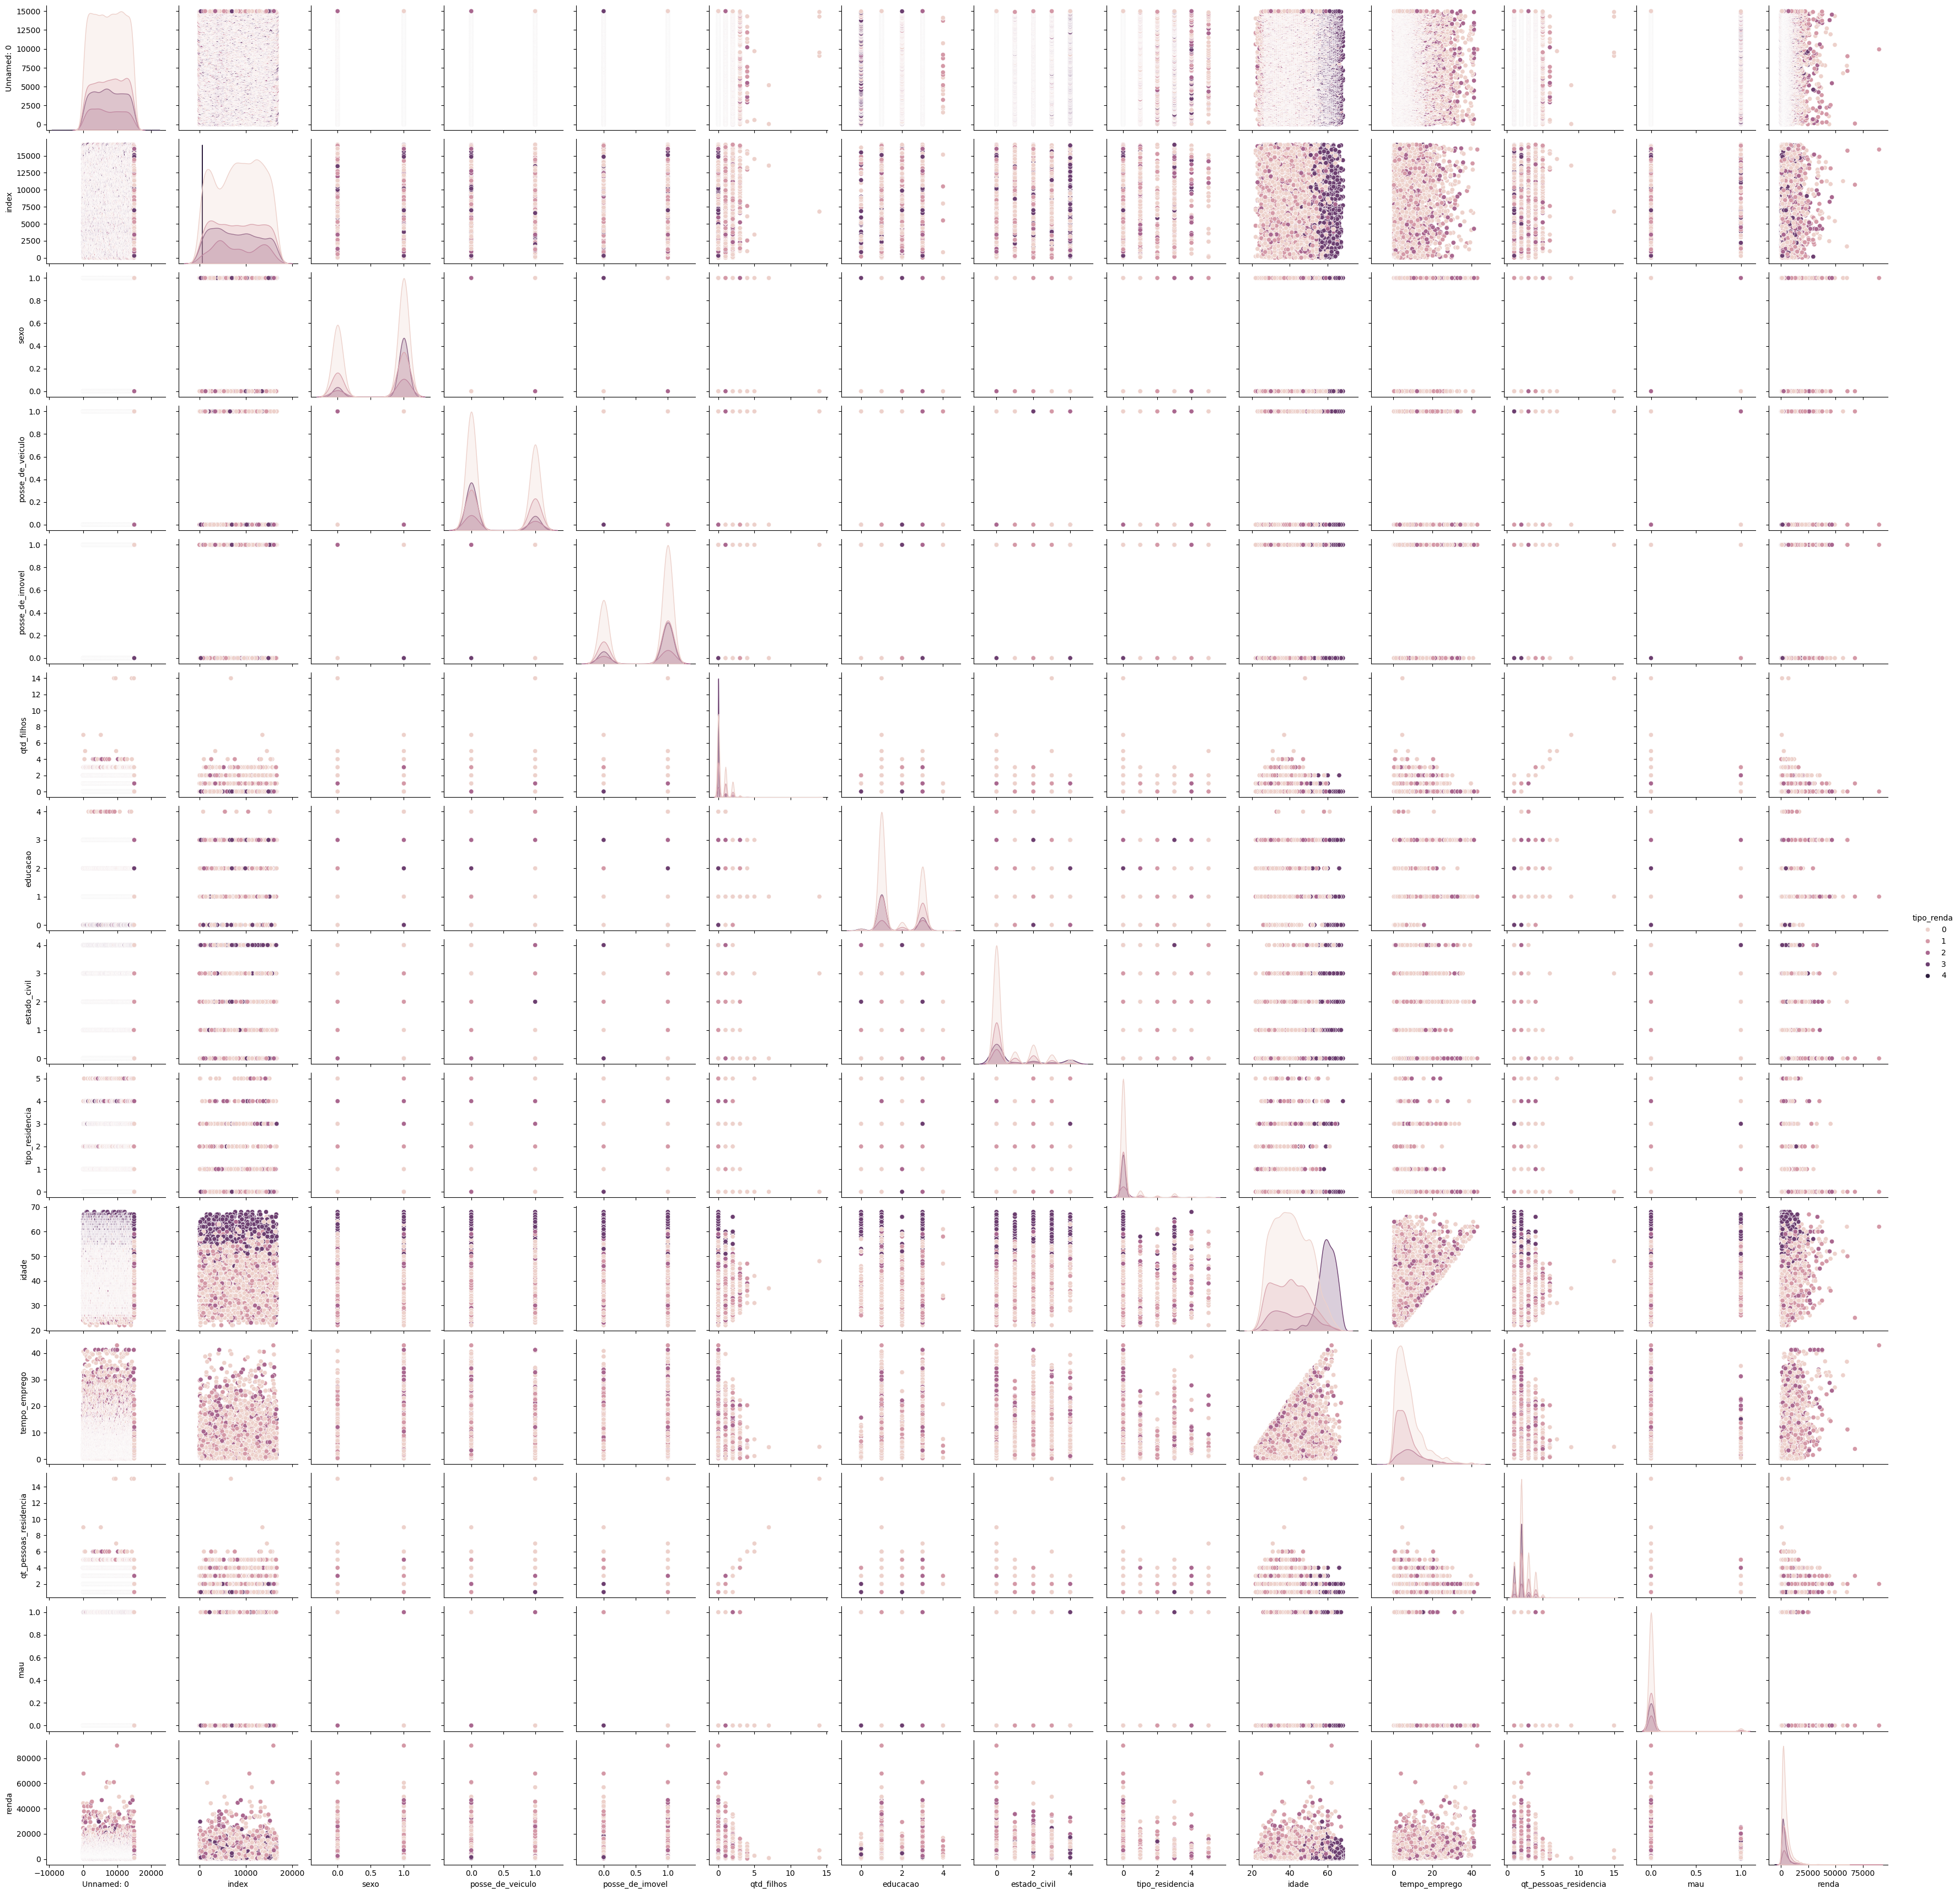

In [31]:
sns.pairplot(df, hue='tipo_renda')

In [33]:
df.corr()

,Unnamed: 0,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.001770,0.002567,0.004003,0.015612,-0.010184,0.166605,-0.008755,0.011022,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.024280,-0.007542,-0.099683,0.039734,-0.039835,0.028325,-0.032058,0.016488,-0.047971,-0.034574,0.041818,0.130691,-0.001740
sexo,0.001770,-0.024280,1.000000,-0.373288,0.044192,-0.126175,0.179609,-0.008722,0.160865,-0.053391,0.218183,0.146123,-0.159661,-0.010563,-0.180722
posse_de_veiculo,0.002567,-0.007542,-0.373288,1.000000,-0.014727,0.107959,-0.127819,0.104819,-0.165399,0.027585,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,0.044192,-0.014727,1.000000,-0.002525,0.078675,-0.002904,0.006972,-0.157777,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,-0.126175,0.107959,-0.002525,1.000000,-0.192796,0.050308,-0.156766,0.022006,-0.364303,-0.074250,0.896488,0.009544,0.009567
tipo_renda,-0.010184,-0.039835,0.179609,-0.127819,0.078675,-0.192796,1.000000,-0.038750,0.099009,-0.037252,0.518176,0.064943,-0.186259,0.008089,-0.046809
educacao,0.166605,0.028325,-0.008722,0.104819,-0.002904,0.050308,-0.038750,1.000000,-0.006635,0.010416,-0.142365,-0.016755,0.034695,0.008486,0.065455
estado_civil,-0.008755,-0.032058,0.160865,-0.165399,0.006972,-0.156766,0.099009,-0.006635,1.000000,0.003413,0.141327,0.010674,-0.539621,0.032883,-0.041147
tipo_residencia,0.011022,0.016488,-0.053391,0.027585,-0.157777,0.022006,-0.037252,0.010416,0.003413,1.000000,-0.076547,-0.022649,0.008497,-0.001342,-0.020580


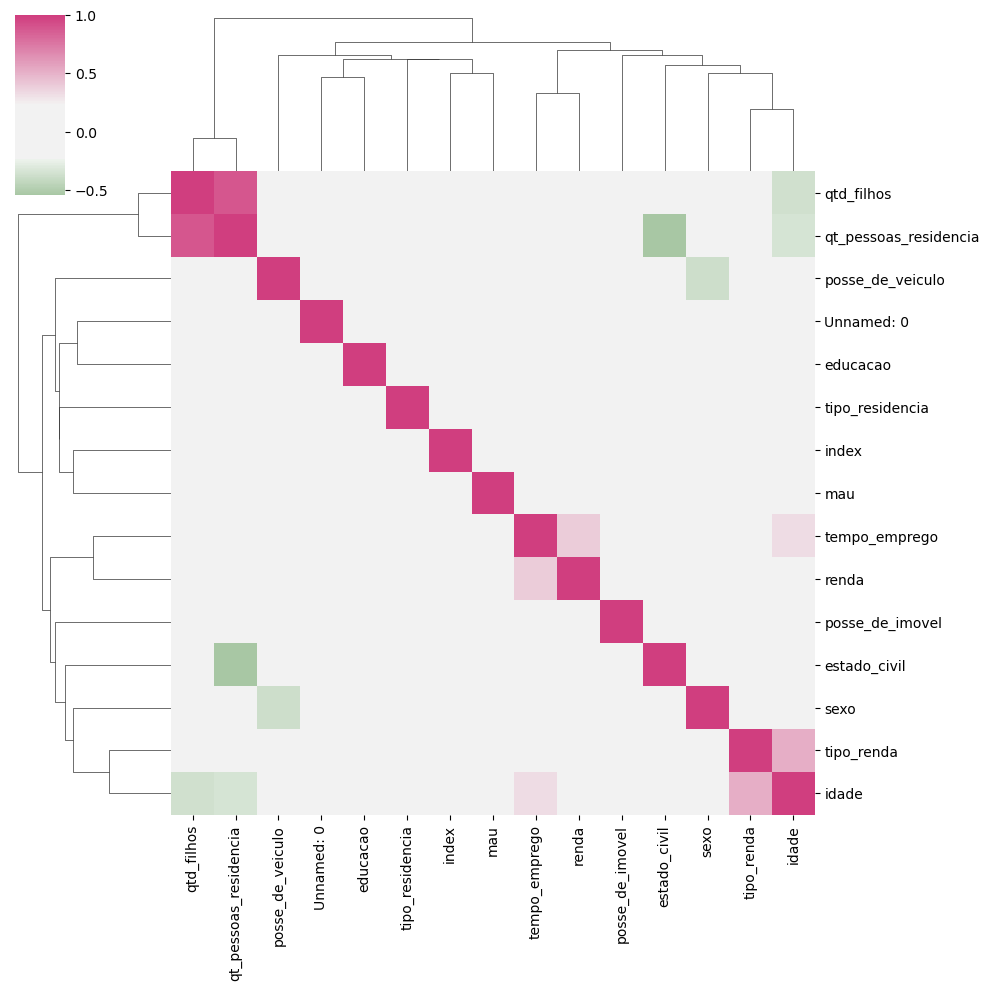

In [37]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap=cmap)

***Resposta:*** Uma observação que pode ser feita é o tempo de emprego se relaciona com o a renda de uma pessoa, enquanto a idade da pessoa também interfere no tipo de renda que ela possui.

***2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.***

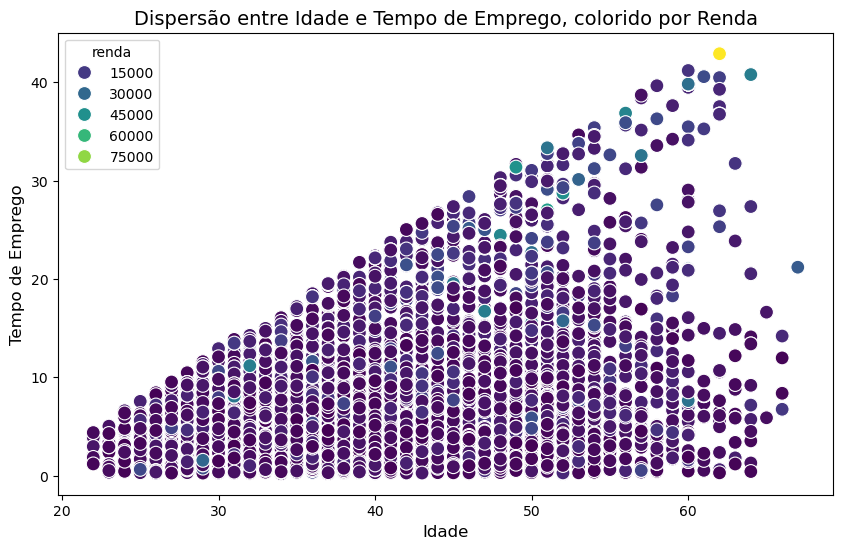

In [51]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['idade'], y=df['tempo_emprego'], hue=df['renda'], palette="viridis", s=100)

# Rótulost
plt.title('Dispersão entre Idade e Tempo de Emprego, colorido por Renda', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Tempo de Emprego', fontsize=12)

plt.show()


***3) Na sua opinião, há outliers na variável renda?***

**Resposta:** Sim, a maioria das pessoas recebem um salário entre 15000 e 45000 ao longo do tempo de emprego e sua idade, porém há um outlier que recebe bem mais do que 45000

**4) Calcule o logaritmo da variável renda e repita a sequência de análise**

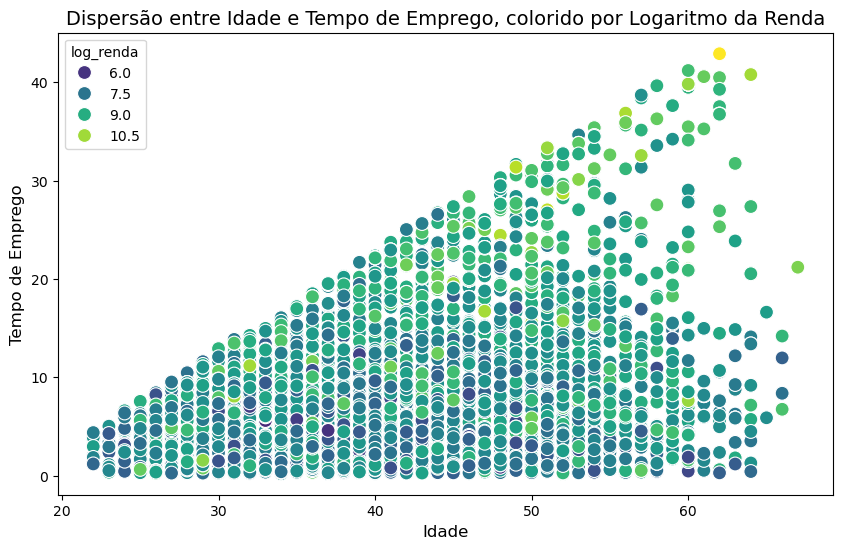

In [58]:
df['log_renda'] = np.log(df['renda'])

# Criando o gráfico de dispersão com o logaritmo da renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['idade'], y=df['tempo_emprego'], hue=df['log_renda'], palette="viridis", s=100)

# Títulos e rótulos
plt.title('Dispersão entre Idade e Tempo de Emprego, colorido por Logaritmo da Renda', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Tempo de Emprego', fontsize=12)

# Exibindo o gráfico
plt.show()

**5) A aplicação do LOG você acha que melhorou ou piorou a análise?**

**Resposta:** Acho que melhorou a vizualização do gráfico, ficou mais claro a diferença entre as rendas das pessoas e da pra notar a concentração de pessoas com uma renda menor no início gráfico enquanto as pessoas com rendas maiores no final.